## Computer Vision

Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Use a confusion matrix and compute accuracy.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

In [1]:
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
 print(y_test[i],'\n') # Print the label
 print(X_test[i],'\n') # Print the matrix of values
 plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
 plt.show()

What is the shape of X_train and X_test? What is the shape of X_train[i] and X_test[i] for each index i? What is the shape of y_train and y_test?

In [3]:
print(X_train.shape)
print(X_test.shape)
print(X_train[0].shape)
print(X_test[0].shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(28, 28)
(28, 28)
(60000,)
(10000,)


Use Numpy's .reshape() method to covert the training and testing data from a matrix into an vector of features. So, X_test[index].reshape((1,784)) will convert the  index -th element of X_test into a  28×28=784 -length row vector of values, rather than a matrix. Turn X_train into an  N×784  matrix  X  that is suitable for scikit-learn's kNN classifier where  N  is the number of observations and  784=28∗28  (you could use, for example, a for loop).

In [ ]:
# # reshape = input('Reshape? (y/n)')
# # if reshape == 'y':

# xtrain = []
# for i in range(60000):
#   row = X_train[i].reshape((1,784))
#   xtrain.append(row[0])
# xtest = []
# for i in range(10000):
#   row = X_test[i].reshape((1,784))
#   xtest.append(row[0])
# xrow = pd.DataFrame(xtrain)
# xterow = pd.DataFrame(xtest)
# xrow.to_csv('xrow.csv')
# xterow.to_csv('xterow.csv')
# # else:
#     xrow = pd.read_csv('xrow.csv')
#     xterow = pd.read_csv('xterow.csv')

#

I forgot that this part took awhile for some so was trying my on structure of it but couldnt get it too work so used what you provided, forgetting that the i=patience was likely the issue more than the code.

In [14]:
Z_train = []
for i in range(60000):
    row = X_train[i].reshape((1,784))
    Z_train.append(row[0])
Z_train = pd.DataFrame(Z_train)
Z_train.to_csv('Z_train.csv')
#
Z_test = []
for i in range(len(y_test)):
    row = X_test[i].reshape((1,784))
    Z_test.append(row[0])
Z_test = pd.DataFrame(Z_test)
Z_test.to_csv('Z_test.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Use the reshaped X_test and y_test data to create a  k -nearest neighbor classifier of digit. What is the optimal number of neighbors  k ? If you can't determine this, play around with different values of  k  for your classifier.

In [15]:
from sklearn.neighbors import KNeighborsClassifier
how_many = 20
k_grid = np.arange(2,how_many)
accuracy = np.zeros(how_many)

for k in range(how_many):
    knn = KNeighborsClassifier(n_neighbors=k+1)
    predictor = knn.fit(Z_train.values,y_train)
    #y_hat = predictor.predict(Z_test.values)
    accuracy[k] = knn.score(Z_test.values,y_test)


[4]


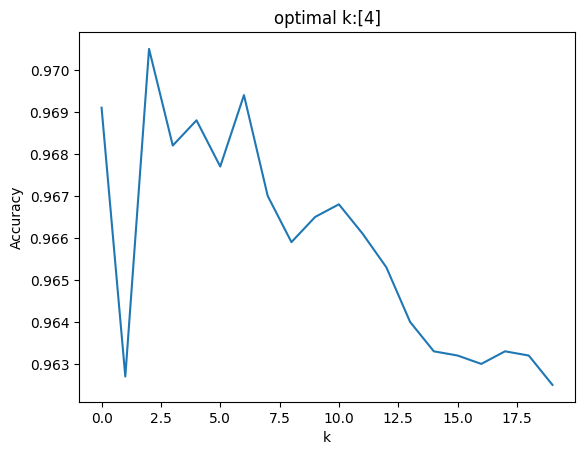

In [18]:
accuracy_max = np.max(accuracy) # highest recorded accuracy
max_index = np.where(accuracy==accuracy_max)
k_star = k_grid[max_index] # Find the optimal value of k
print(k_star)

plt.plot(np.arange(0,how_many),accuracy) # Plot accuracy by k
plt.xlabel("k")
plt.title("optimal k:"+str(k_star))
plt.ylabel('Accuracy')
plt.show()

For the optimal number of neighbors, how well does your predictor perform on the test set? Use a confusion matrix and compute accuracy.

In [19]:

knn = KNeighborsClassifier(n_neighbors=4)
predictor = knn.fit(Z_train.values,y_train)
y_hat = predictor.predict(Z_test.values)

accuracy = knn.score(Z_test.values,y_test) # Bug in sklearn requires .values
print('Accuracy: ', accuracy)

pd.crosstab(y_test, y_hat)

Accuracy:  0.9682


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,976,1,1,0,0,1,0,1,0,0
1,0,1133,2,0,0,0,0,0,0,0
2,11,8,993,1,1,0,0,16,2,0
3,0,2,5,979,1,10,1,7,2,3
4,3,9,0,0,952,0,4,1,0,13
5,4,0,0,17,2,862,5,1,0,1
6,6,3,0,0,4,3,942,0,0,0
7,0,23,5,0,5,0,0,988,0,7
8,9,3,5,16,6,19,5,5,902,4


The predictor does well, it makes the correct prediction for about 96% (? this cant be right) of the values.

For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?

The mistakes that are most common are misclassifications of visually similiar numbers. Numbers like 8 and 5 and 9 and 7 which share a general shape with each other.

So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)


To convert a matrix into tabular data I would use the same method as above, reshaping the matrix into a row of vectors.

 To add color data, I would use the RGB color codes to represent the color of each pixel. Currently we can see the shape of the number in the matrix by the arrangement of values where 0 represents no part of the shape and progressively larger numbers represent more defined parts of the shape. Like the way the numbers define the shape, numbers can define the color of the shape. You could make new matrices that represent each of the primary RGB colors. In these matrices the strength of the color would follow the magnitude of the color codes. So, in the matrix pixels (i think) would still be in the shape of the number however the numerical value would represent how green, red, or blue that pixel is. To get the final color wou would somehow combine the color values of each red, green, and blue matrix.